# Student Performance Prediction using Logistic Regression

# **Step 1: Import Required Libraries**
**We begin by importing the necessary libraries:**


*   pandas for working with data
*   matplotlib for basic plots

*   sklearn for building and evaluating the machine learning model












In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Step 2: Create the Dataset
**We manually create a small dataset with three columns:**



*   Hours_Studied: How many hours the student studied

*   Attendance: The student’s attendance percentage
*   Pass_Fail: Target label (1 = Pass, 0 = Fail)


This data simulates real-world student performance with just a few records to make training and testing simple.

In [12]:
data = {
    'Hours_Studied': [5, 2, 4, 1, 6, 3, 2, 7, 4, 1],
    'Attendance': [85, 60, 75, 50, 90, 65, 55, 95, 70, 40],
    'Pass_Fail': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
}



df = pd.DataFrame(data)
df


,Hours_Studied,Attendance,Pass_Fail
0,5,85,1
1,2,60,0
2,4,75,1
3,1,50,0
4,6,90,1
5,3,65,0
6,2,55,0
7,7,95,1
8,4,70,1
9,1,40,0


# Step 3: Visualize the Data
Before training the model, we visualize the data to see if there's any clear pattern between study time, attendance, and pass/fail outcome. This helps us interpret how our features relate to the result.

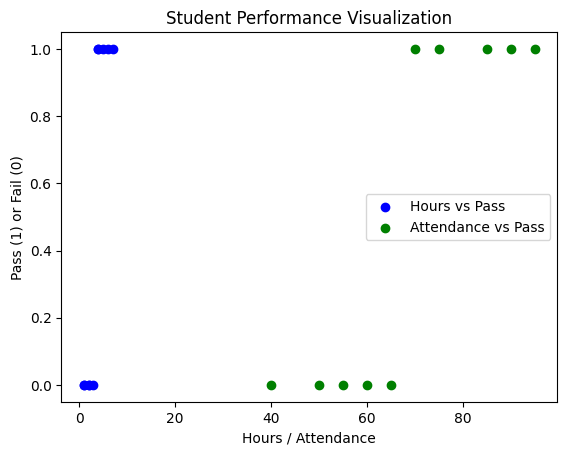

In [13]:
plt.scatter(df['Hours_Studied'], df['Pass_Fail'], color='blue', label='Hours vs Pass')
plt.scatter(df['Attendance'], df['Pass_Fail'], color='green', label='Attendance vs Pass')
plt.xlabel("Hours / Attendance")
plt.ylabel("Pass (1) or Fail (0)")
plt.legend()
plt.title("Student Performance Visualization")
plt.show()


# Step 4: Prepare the Data for Modeling
**We now prepare the data for model training:**

*   X contains the input features: Hours_Studied and Attendance
*   y contains the target output: Pass or Fail







We then split the dataset into training and test sets using train_test_split() from scikit-learn. This ensures we can evaluate how well the model performs on unseen data.



In [14]:
X = df[['Hours_Studied', 'Attendance']]
y = df['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Train the Logistic Regression Model
We initialize a LogisticRegression model and fit it to the training data using .fit(). Logistic regression is ideal for binary classification problems, like pass (1) or fail (0).

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Step 6: Evaluate the Model
**After training, we evaluate the model using:**

*   Accuracy Score: How many predictions are correct
*   Confusion Matrix: A summary of prediction results in table form







These metrics help us understand the performance and reliability of the model.

In [16]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

print("Confusion Matrix:\n", cm)


Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


# Step 7: Predict New Student Outcomes
We test the model with new, unseen data using .predict(). By giving values for hours studied and attendance, we can predict whether a new student is likely to pass or fail.

This step demonstrates how the model can be used in a real-world scenario.



In [17]:
new_data = pd.DataFrame({'Hours_Studied': [3, 6], 'Attendance': [70, 95]})
predictions = model.predict(new_data)
print("Predicted Pass/Fail:", predictions)

Predicted Pass/Fail: [0 1]


In [18]:
for i, result in enumerate(predictions):
    print(f"Student {i+1}: {'Pass' if result == 1 else 'Fail'}")


Student 1: Fail
Student 2: Pass
